## Imports

In [1]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import pandas as pd

# Import our own implementations
import importlib, gradient_descent, prepare_data, polynomial_features
importlib.reload(gradient_descent)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)


from prepare_data import prepare_data
from polynomial_features import polynomial_features
from gradient_descent import gradient_descent_LASSO, momentum_gradient_descent_LASSO, \
    ADAGrad_gradient_descent_LASSO, RMSProp_gradient_descent_LASSO, ADAM_gradient_descent_LASSO

# Styling function
from Set_latex_params import set_mpl_latex_style
set_mpl_latex_style()



## Testing Functions

### Standard gradient descent function, LASSO 

In [2]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 10
lam = 0.001
eta = 1e-2
num_iters = 100000

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-3
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.         -0.97514466  0.00854018  1.02293945  0.         -0.
 -0.         -0.07509688 -0.00896357 -0.200661  ]
Number of iterations: 100000
LASSO coefficients, Scikit learn:  [-0.         -1.03027552  0.00653717  1.18298956  0.         -0.
 -0.         -0.3804637  -0.00671807 -0.        ]
GD parameters equal to parameters from sklearn: [ True False False False  True  True  True False False False].
Tolerance = 0.001


### Gradient descent with momentum, LASSO

In [3]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 4
lam = 0.0001
eta = 1e-3
num_iters = 100000
mom = 0.1

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = momentum_gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, momentum=mom, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02760925 -0.64512713  0.02952902  0.450475  ]
Number of iterations: 55472
LASSO coefficients, Scikit learn:  [-0.02142985 -0.69949953  0.02566578  0.50494923]
GD parameters equal to parameters from sklearn: [ True False  True False].
Tolerance = 0.01


### Gradient descent with ADAGrad, LASSO

In [4]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 10
lam = 0.001
eta = 1e-1
num_iters = 100000

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAGrad_gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.         -1.03160022  0.00660484  1.18531463  0.         -0.
 -0.         -0.3815634  -0.00679305 -0.        ]
Number of iterations: 17109
LASSO coefficients, Scikit learn:  [-0.         -1.03027552  0.00653717  1.18298956  0.         -0.
 -0.         -0.3804637  -0.00671807 -0.        ]
GD parameters equal to parameters from sklearn: [ True  True  True  True  True  True  True  True  True  True].
Tolerance = 0.01


### Gradient descent with RMSProp, LASSO

In [5]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8
lam = 0.00001
eta = 1e-3
num_iters = 100000

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = RMSProp_gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.02672266 -2.09401031  0.17867277  5.81977076 -0.33512042 -6.56941488
  0.18842858  2.61217172]
Number of iterations: 100000
LASSO coefficients, Scikit learn:  [-0.02614834 -2.13960258  0.17734494  6.03823973 -0.34226685 -6.89443157
  0.19468921  2.7667896 ]
GD parameters equal to parameters from sklearn: [ True False  True False  True False  True False].
Tolerance = 0.01


### Gradient descent with ADAM, LASSO

In [6]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 10
lam = 1e-3
eta = 1e-2
num_iters = 100000

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAM_gradient_descent_LASSO(X_train_s, y_train, lam = lam, eta=eta, num_iters=num_iters)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
# Lasso parameters from ScikitLearn
lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=num_iters)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
print("LASSO coefficients, Scikit learn: ", beta_sklearn)
tol=1e-2
is_close = np.isclose(beta, beta_sklearn, rtol=tol, atol=tol)
print(f"GD parameters equal to parameters from sklearn: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.         -1.0316093   0.00660528  1.18533104  0.         -0.
 -0.         -0.38157144 -0.00679357 -0.        ]
Number of iterations: 2595
LASSO coefficients, Scikit learn:  [-0.         -1.03027552  0.00653717  1.18298956  0.         -0.
 -0.         -0.3804637  -0.00671807 -0.        ]
GD parameters equal to parameters from sklearn: [ True  True  True  True  True  True  True  True  True  True].
Tolerance = 0.01


## Finding optimal LASSO complexity and regularization with Scikit-learn

In [7]:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)
pol = 15
# lambdas = np.concatenate((np.logspace(1,-5,14),np.array([0])))
lambdas = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10]

mse_r2_scores = np.zeros((pol,len(lambdas)))

pol_degrees = np.arange(1,pol+1,dtype=int)


for pol in pol_degrees:    
    X_train = polynomial_features(x_train,pol, False)
    X_test = polynomial_features(x_test, pol, False)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    y_offset = np.mean(y_train)

    for i,lam in enumerate(lambdas):
        lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=10000000)
        lasso.fit(X_train_s, y_train)
        beta_sklearn = lasso.coef_
        y_test_fit = X_test_s@beta_sklearn
        mse_r2_scores[pol-1,i] = mean_squared_error(y_test,y_test_fit+y_offset)

df = pd.DataFrame(mse_r2_scores)
df.index = pol_degrees
df.columns = lambdas
df = df.rename_axis("Pol deg", axis=0).rename_axis("Lambda", axis=1)
df

Lambda,0.00001,0.00010,0.00100,0.01000,0.10000,1.00000,10.00000
Pol deg,,,,,,,
1,0.075719,0.075700,0.075512,0.073769,0.072478,0.072478,0.072478
2,0.043856,0.043819,0.043454,0.040080,0.037244,0.072478,0.072478
3,0.046310,0.046193,0.045064,0.040080,0.037244,0.072478,0.072478
4,0.022947,0.022732,0.020734,0.016442,0.037244,0.072478,0.072478
5,0.023292,0.022957,0.020740,0.016442,0.037244,0.072478,0.072478
6,0.014393,0.013039,0.007103,0.019969,0.037244,0.072478,0.072478
7,0.014148,0.013174,0.007103,0.019969,0.037244,0.072478,0.072478
8,0.009453,0.003526,0.010362,0.019969,0.037244,0.072478,0.072478
9,0.009924,0.003610,0.010568,0.019969,0.037244,0.072478,0.072478


In [8]:
latex_code = df.to_latex(index=False)

with open("table_LASSO.tex", "w") as f:
    f.write(latex_code)

### Extracting optimal LASSO complexity and penalty, based on MSE

In [9]:
min_val = df.min().min()  # lowest MSE score
min_col = df.min().idxmin()  # lambda with lowest MSE
min_row = df[min_col].idxmin()  # polynomial degree with lowest MSE

print(f"Smallest MSE: {min_val:.5f}")
print(f"Best polynomial degree: {min_row}")
print(f"Best lambda: {min_col}")

Smallest MSE: 0.00278
Best polynomial degree: 10
Best lambda: 1e-05


### Plotting the model with the smallest MSE, LASSO

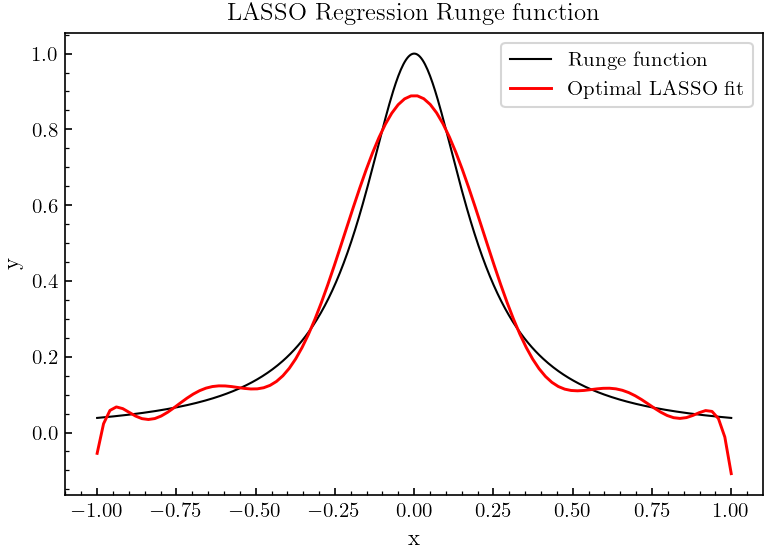

The R2-score for the optimal LASSO parameters is: 0.9593040957100869


In [10]:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data()
pol=10
lam=1e-5

X_train = polynomial_features(x_train,pol, False)
X_test = polynomial_features(x_test, pol, False)
X_plot = polynomial_features(x, pol, False)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)
y_offset = np.mean(y_train)

lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=10000000)
lasso.fit(X_train_s, y_train)
beta_sklearn = lasso.coef_
y_fit = X_plot_s@beta_sklearn + y_offset

x_dense = np.linspace(-1, 1, 500)
y_runge = 1 / (1 + 25 * x_dense**2)
plt.plot(x_dense, y_runge, color="black", linewidth=1, label="Runge function")
plt.plot(x, y_fit, color="red",label="Optimal LASSO fit")
plt.title("LASSO Regression Runge function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("Plots/optimal_LASSO_fit.pdf", bbox_inches="tight")
plt.show()

## Also compute R2-score for this fit:
y_test_fit = X_test_s@beta_sklearn + y_offset
R2_optimal = (r2_score(y_test, y_test_fit))
print(f"The R2-score for the optimal LASSO parameters is: {R2_optimal}")

## Computing parameters for different Lambdas, degree = 10

In [11]:
# Prepare data:
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 10
mom = 0.9
lambdas = np.logspace(-4, 2,20)
eta = 1e-3
num_iters = 500000
mom = 0.9

# Lists for MSEs
MSE_closed_form_LASSO = []
MSE_gd_fixed_learning_rate_LASSO = []
MSE_gd_momentum_LASSO = []
MSE_gd_ADAGrad_LASSO = []
MSE_gd_RMSProp_LASSO = []
MSE_gd_ADAM_LASSO = []

# Lists for R2-scores
R2_score_closed_form_LASSO=[]
R2_gd_fixed_learning_rate_LASSO = []
R2_gd_momentum_LASSO = []
R2_gd_ADAGrad_LASSO = []
R2_gd_RMSProp_LASSO = []
R2_gd_ADAM_LASSO = []

# Lists for n_iterations
num_iterations_gd_fixed_learning_rate_LASSO = []
num_iterations_gd_momentum_LASSO = []
num_iterations_gd_ADAGrad_LASSO = []
num_iterations_gd_RMSProp_LASSO = []
num_iterations_gd_ADAM_LASSO = []

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)

y_offset = np.mean(y_train)

for l in lambdas:
    # Computing parameters with the different methods:
    # SCIKITLEARN solution
    lasso = Lasso(alpha=l, fit_intercept=False, max_iter=num_iters)
    lasso.fit(X_train_s, y_train)
    beta_sklearn = lasso.coef_
    
    # Gradient descent, fixed learning rate:
    beta_gd_fixed_rate, t = gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-4, num_iters=num_iters)
    num_iterations_gd_fixed_learning_rate_LASSO.append(t)
    # Gradient descent with momentum
    beta_gd_momentum, t = momentum_gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-3, momentum=mom, num_iters=num_iters)
    num_iterations_gd_momentum_LASSO.append(t)
    # Gradient descent with ADAGrad
    beta_gd_ADAGrad, t = ADAGrad_gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-1, num_iters=num_iters)
    num_iterations_gd_ADAGrad_LASSO.append(t)
    # Gradient descent with RMSProp
    beta_gd_RMSProp, t = RMSProp_gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-5, num_iters=num_iters)
    num_iterations_gd_RMSProp_LASSO.append(t)
    # Gradient descent with ADAM
    beta_gd_ADAM, t = ADAM_gradient_descent_LASSO(X_train_s, y_train, lam=l, eta=1e-2, num_iters=num_iters)
    num_iterations_gd_ADAM_LASSO.append(t)
    
    # Predict
    y_pred_closed = X_test_s @ beta_sklearn + y_offset
    y_pred_gd_fixed_rate = X_test_s @ beta_gd_fixed_rate + y_offset
    y_pred_momentum = X_test_s @ beta_gd_momentum + y_offset
    y_pred_ADAGrad = X_test_s @ beta_gd_ADAGrad + y_offset
    y_pred_RMSProp = X_test_s @ beta_gd_RMSProp + y_offset
    y_pred_ADAM = X_test_s @ beta_gd_ADAM + y_offset
    
    # Append MSEs
    MSE_closed_form_LASSO.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_fixed_learning_rate_LASSO.append(mean_squared_error(y_test, y_pred_gd_fixed_rate))
    MSE_gd_momentum_LASSO.append(mean_squared_error(y_test, y_pred_momentum))
    MSE_gd_ADAGrad_LASSO.append(mean_squared_error(y_test, y_pred_ADAGrad))
    MSE_gd_RMSProp_LASSO.append(mean_squared_error(y_test, y_pred_RMSProp))
    MSE_gd_ADAM_LASSO.append(mean_squared_error(y_test, y_pred_ADAM))

    
    # Append R2 scores
    R2_score_closed_form_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_gd_fixed_learning_rate_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_gd_fixed_rate))
    R2_gd_momentum_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_momentum))
    R2_gd_ADAGrad_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_ADAGrad))
    R2_gd_RMSProp_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_RMSProp))
    R2_gd_ADAM_LASSO.append(r2_score(y_true=y_test, y_pred = y_pred_ADAM))

## Plotting results

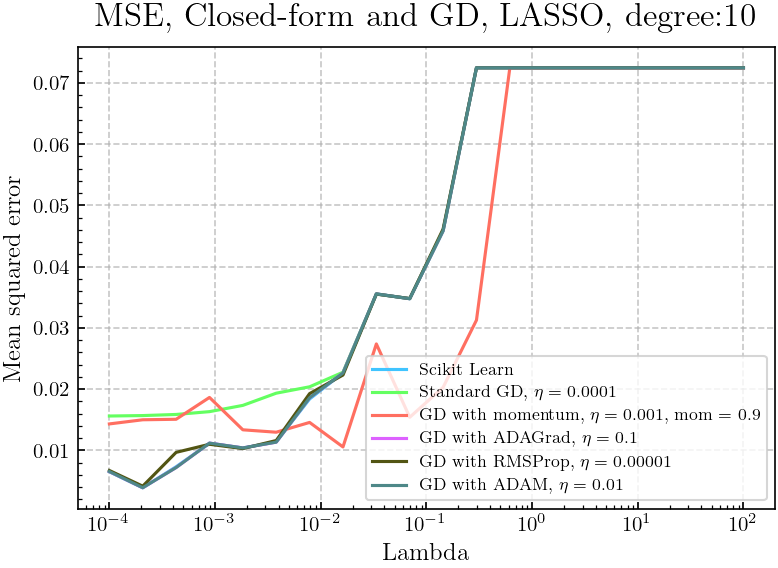

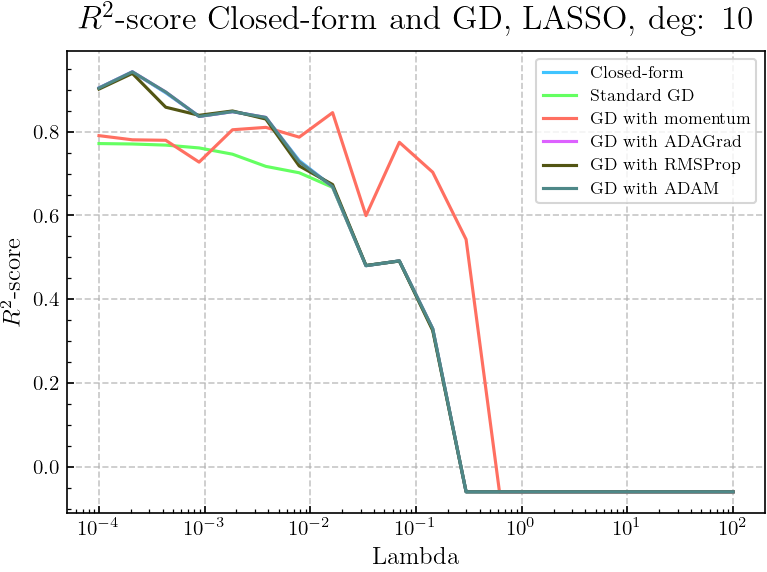

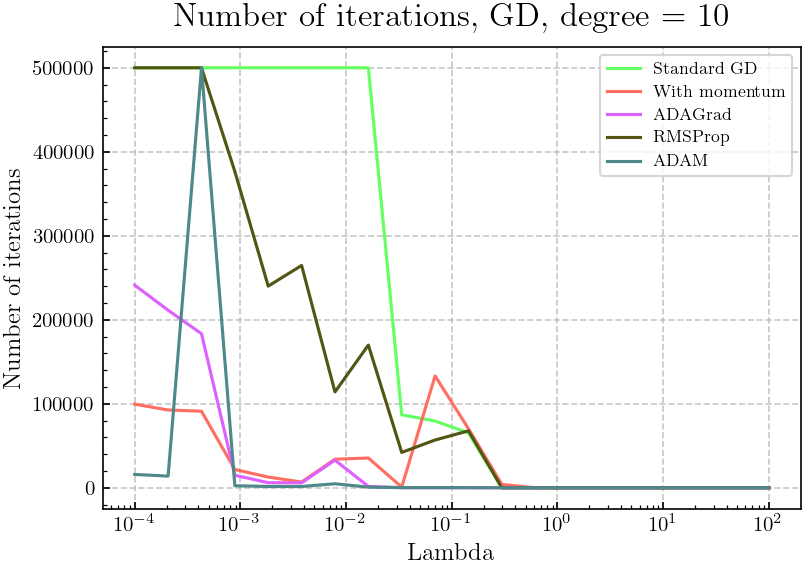

In [16]:
# MSEs
plt.figure()
plt.plot(lambdas, MSE_closed_form_LASSO, label="Scikit Learn", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_fixed_learning_rate_LASSO, label="Standard GD, $\eta = 0.0001$", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_momentum_LASSO, label="GD with momentum, $\eta = 0.001$, mom = 0.9", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAGrad_LASSO, label="GD with ADAGrad, $\eta = 0.1$", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, MSE_gd_RMSProp_LASSO, label="GD with RMSProp, $\eta = 0.00001$", color='#525513', linewidth=1.5)
plt.plot(lambdas, MSE_gd_ADAM_LASSO, label="GD with ADAM, $\eta = 0.01$", color='#4E8888', linewidth=1.5)
plt.title(f"MSE, Closed-form and GD, LASSO, degree:{p} ", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/mse_gradient_descent_methods_LASSO.pdf", bbox_inches="tight")
plt.show()


# R2-scores
plt.plot(lambdas, R2_score_closed_form_LASSO, label="Closed-form", color='#40C4FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_fixed_learning_rate_LASSO, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, R2_gd_momentum_LASSO, label="GD with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAGrad_LASSO, label="GD with ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, R2_gd_RMSProp_LASSO, label="GD with RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, R2_gd_ADAM_LASSO, label="GD with ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"$R^2$-score Closed-form and GD, LASSO, deg: {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("$R^2$-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda",fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/r2_gradient_descent_methods_LASSO.pdf", bbox_inches="tight")
plt.show()


# Number of iterations
plt.plot(lambdas, num_iterations_gd_fixed_learning_rate_LASSO, label="Standard GD", color='#64FF61', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_momentum_LASSO, label="With momentum", color='#FF6F61', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_ADAGrad_LASSO, label="ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_RMSProp_LASSO, label="RMSProp", color='#525513', linewidth=1.5)
plt.plot(lambdas, num_iterations_gd_ADAM_LASSO, label="ADAM", color='#4E8888', linewidth=1.5)
plt.title(rf"Number of iterations, GD, degree = {p}", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Lambda", fontsize=12, fontfamily='sans-serif')
plt.xscale("log")
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/number_of_iterations_gradient_descent_methods_LASSO.pdf", bbox_inches="tight")
plt.show()